<a href="https://colab.research.google.com/github/antonypaulson/Text-Mining-and-Social-Media-Analytics/blob/master/Machine_Learning_with_text_data_(Text_Mining_Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Importing the libraries
import pandas as pd
import numpy as np
cloth_df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [0]:
#Displaying the head of the data
cloth_df.head()

Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

In [0]:
#Displaying Columns of the dataset
cloth_df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [0]:
#Finding the distinct clothing items covered by the dataset
distinct_items = len(set(cloth_df['Clothing ID']))
print ('The dataset contains', distinct_items, 'Clothing Items')

The dataset contains 1206 Clothing Items


In [0]:
#The ten most poular items in the dataset
popular_table = cloth_df.groupby('Clothing ID').size()
popular_table = popular_table.reset_index(name= 'Count').nlargest(100,'Count')
popular_table.head(10)

Clothing ID  Count
1078         1078   1024
862           862    806
1094         1094    756
1081         1081    582
872           872    545
829           829    527
1110         1110    480
868           868    430
895           895    404
936           936    358

In [0]:
#Creating a new data frame for reviews
result = cloth_df
result = result.drop(columns = ['Unnamed: 0', 'Age', 'Title', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'])
result.reset_index( drop = True, inplace = True)
result.head()
result = result.sort_values('Clothing ID')
result = result.dropna()

In [0]:
result = result.groupby('Clothing ID')['Review Text'].apply(' '.join).reset_index()

In [0]:
result.tail()

Clothing ID                                        Review Text
1174         1200  Bought this dress without trying it on but lis...
1175         1202  I'm taking this to hawaii for the holidays, i'...
1176         1203  Love these tanks so much i have them in every ...
1177         1204  I love these pants. i have them in navy and ca...
1178         1205  Just received my second pair of pilcro in the ...

In [0]:
#Creating a dataframe for the combined reviews of the most popular Clothing items
popular_df = pd.merge(popular_table, result, on='Clothing ID')

In [0]:
popular_df.head()

Clothing ID  Count                                        Review Text
0         1078   1024  This dress is extremely flattering on and look...
1          862    806  This is a great shirt. it's super comfortable ...
2         1094    756  The catalog shot and model shot are completely...
3         1081    582  I like the way the skirt of the dress swings w...
4          872    545  This top is much nicer than expected.....the f...

In [0]:
Reviews = popular_df['Review Text']
Reviews = [str(i) for i in Reviews]

In [0]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
s = ''.join(Reviews)
s

'This dress is extremely flattering on and looks a lot better when worn than on the hanger. the cut drapes very nicely and is true to size. i am 5 feet tall / 95lbs and the xxsp fit perfectly. it is a bit short however, so i would caution that it may not be work "office" appropriate if you are taller. like most hd in paris dresses, it is also quite thin although lined. this dress would look lovely with a either delicate jewelry or a bold statement piece and is casual enough for a lunch outing or Bought this dress for an indian wedding- it was perfect! If you are shaped anything like me, you will have to size up quite a bit on this one. i tried it on in my normal size and probably needed to size up 2 or more sizes to get the proper fit. the fabric has no "give" and feels a little cheap in my opinion. for your reference, i am a curvy, athletic build with broad shoulders. Love this dress!!! i agree with the other reviewers, i had to size up one size, but then it was perfect. i\'m 5\'5, 12

In [0]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
wordset = []
for i in nltk.word_tokenize(s):
  wordset.append(i)

In [0]:
wordset = [word for word in wordset if word.lower() not in stop_words and word.isalpha()]

In [0]:
len(wordset)

482899

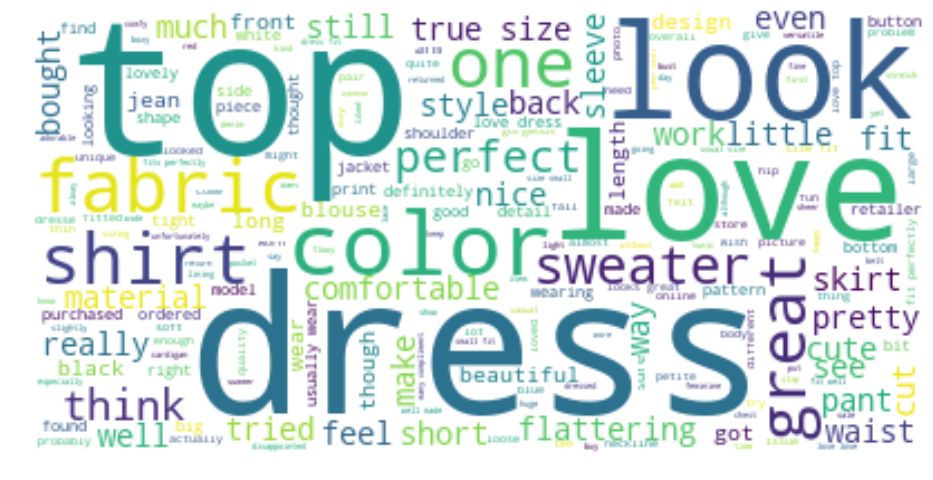

In [0]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wc = WordCloud(background_color='white').generate(' '.join(wordset))
plt.figure(figsize=(16,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [0]:
import nltk
fdist=nltk.FreqDist(wordset)
print(fdist.most_common(90))

[('dress', 9345), ('size', 6744), ('top', 6254), ('love', 6132), ('fit', 5685), ('like', 5279), ('wear', 4928), ('great', 4518), ('would', 4183), ('fabric', 3783), ('color', 3607), ('small', 3377), ('look', 3086), ('really', 2937), ('little', 2927), ('perfect', 2892), ('ordered', 2871), ('one', 2840), ('flattering', 2822), ('well', 2497), ('back', 2486), ('soft', 2404), ('bought', 2297), ('looks', 2277), ('comfortable', 2274), ('shirt', 2244), ('nice', 2238), ('cute', 2210), ('bit', 2196), ('fits', 2185), ('beautiful', 2155), ('much', 2127), ('large', 2107), ('material', 2102), ('length', 2064), ('jeans', 1996), ('also', 1965), ('petite', 1888), ('got', 1871), ('colors', 1830), ('could', 1807), ('long', 1795), ('sweater', 1767), ('waist', 1748), ('work', 1722), ('think', 1708), ('pretty', 1689), ('retailer', 1652), ('quality', 1649), ('tried', 1633), ('even', 1626), ('medium', 1620), ('store', 1601), ('xs', 1589), ('usually', 1526), ('good', 1447), ('cut', 1443), ('get', 1440), ('short

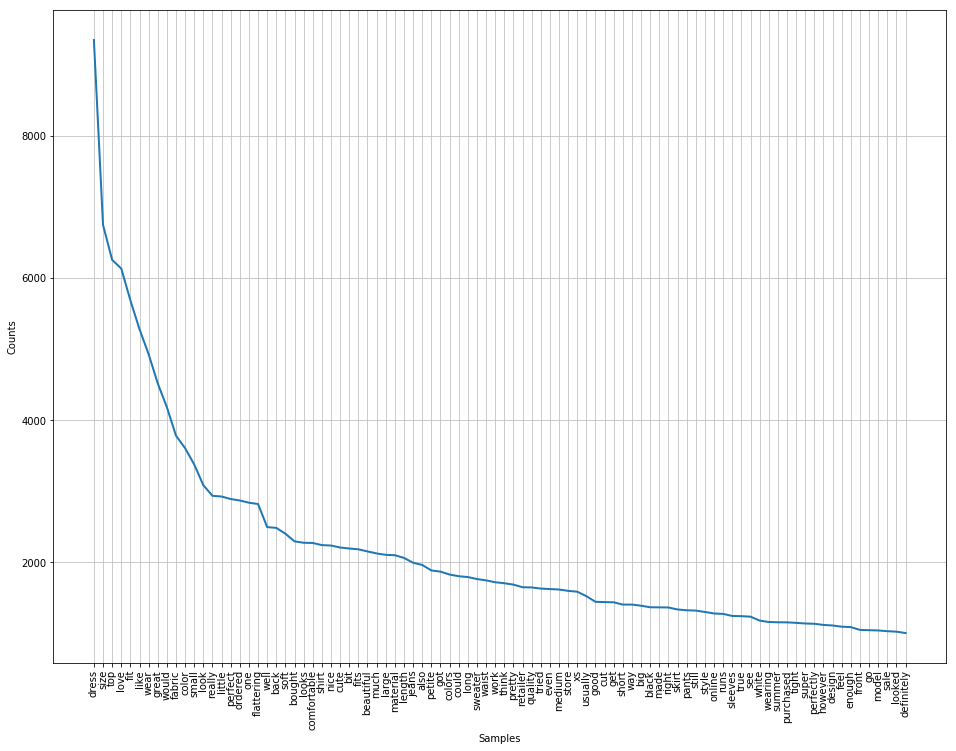

In [0]:
plt.figure(figsize=(16,12))
fdist.plot(90)

In [0]:
popularity_words = [x[0] for x in fdist.most_common(90)]

In [0]:
new_df = result

In [0]:
for word in popularity_words:
  new_df[word] = np.nan

In [0]:
new_df.columns

Index(['Clothing ID', 'Review Text', 'dress', 'size', 'top', 'love', 'fit',
       'like', 'wear', 'great', 'would', 'fabric', 'color', 'small', 'look',
       'really', 'little', 'perfect', 'ordered', 'one', 'flattering', 'well',
       'back', 'soft', 'bought', 'looks', 'comfortable', 'shirt', 'nice',
       'cute', 'bit', 'fits', 'beautiful', 'much', 'large', 'material',
       'length', 'jeans', 'also', 'petite', 'got', 'colors', 'could', 'long',
       'sweater', 'waist', 'work', 'think', 'pretty', 'retailer', 'quality',
       'tried', 'even', 'medium', 'store', 'xs', 'usually', 'good', 'cut',
       'get', 'short', 'way', 'big', 'black', 'made', 'right', 'skirt',
       'pants', 'still', 'style', 'online', 'runs', 'sleeves', 'true', 'see',
       'white', 'wearing', 'summer', 'purchased', 'tight', 'super',
       'perfectly', 'however', 'design', 'feel', 'enough', 'front', 'go',
       'model', 'sale', 'looked', 'definitely'],
      dtype='object')

In [0]:
i = 0
for review in new_df['Review Text']:
  for word in popularity_words:
    if word in nltk.word_tokenize(review):
      b = (nltk.word_tokenize(review)).count(word)
      new_df.loc[i, word] = b
    else:
      pass
  print (i)
  i = i + 1
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [0]:
new_df

Clothing ID                                        Review Text  dress  \
0               1  Originally i bought this in black and white. r...    NaN   
1               2  I just adore this top! it is so comfy and styl...    NaN   
2               3  I love this sweater. definite classic. i get l...    NaN   
3               4  This sweater is so comfy and classic - it bala...    1.0   
4               5  I'm currently on the prowl for the other color...    NaN   
5               7  I love this coat. i bought it in 2012, and it ...    NaN   
6               8  This bathing suit has everything. i especially...    NaN   
7               9  The velvet isn't as soft or plush as i thought...    NaN   
8              10  This dress is comfortable and a great piece to...    1.0   
9              11  The color says red but it's more like a rust. ...    NaN   
10             12  Love this striped top! it's perfect to throw o...    NaN   
11             13  I love the color, the fabric and the style (es...    2.0   
12             14  The bikini bottoms are high quality and feel v...    NaN   
13             15  Way too long...the sizing is incredibly off on...    NaN   
14             16  This gorgeous dress really does bloom before y...    1.0   
15             17  I absolutely love this dress! i got it right a...    3.0   
16             18  I ordered these leggings and loved them, for a...    NaN   
17             19  I purchased this jacket in my usual size s, bu...    NaN   
18             20  My husband bought this for my birthday. i love...    NaN   
19             21  Just like the afterward lace cardigan i love t...    NaN   
20             22  This is my favorite shirt ever. i've had it fo...    NaN   
21             23  I get more compliments on the stress. it is pe...    1.0   
22             24  I absolutely love the retro look of this swims...    NaN   
23             25  This sweater is the best sweater to throw on o...    NaN   
24             26  I'm 5'9 and wear a size 12. this dress runs tt...    1.0   
25             27  This bra surprised me by how good it looks on....    NaN   
26             28  This suit is perfect in every way! (the leg op...    NaN   
27             29  I actually saw angela from the tv show bones w...    2.0   
28             30  I love this dress, but have found that this br...    1.0   
29             32  I absolutely adore this set. it's beautifully ...    NaN   
...           ...                                                ...    ...   
1149         1175  Despite other reviewers comments on size - i r...    NaN   
1150         1176  I wore this suit for the first time yesterday ...    NaN   
1151         1177  I ordered this in an xs and it fits well. howe...    NaN   
1152         1178  This tank is fairly soft and fits true to size...    NaN   
1153         1179  I bought a size xl in the white with brighter ...    NaN   
1154         1180  To be honest, i bought this as a pregnancy top...    NaN   
1155         1181  All t-la's are great. but this one style is my...    NaN   
1156         1182  I could wear this every day, it is stylish and...    NaN   
1157         1183  This shirt is so soft and buttery! it fits tts...    NaN   
1158         1184  I love the color of this top. it is a dark oli...    NaN   
1159         1185  It's the inverted invert ... not so obvious at...    NaN   
1160         1186  I've been scouting retailer's store, looking f...    NaN   
1161         1187  This is the perfect peplum. it floats a bit bu...    NaN   
1162         1188  This is a great winter addition to any wardrob...    1.0   
1163         1189  These are so much better than i anticipated! t...    NaN   
1164         1190  These are great pants, have them in the green ...    2.0   
1165         1191  I was excited to see these on sale in the hone...    NaN   
1166         1192  Love this chinos.  they fit tts and the blue i...    NaN   
1167         1193  This is the perfect casual yet stylis

In [0]:
final_df = new_df
final_df = final_df.fillna(0)
final_df.to_csv('test1_out.csv')


In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)



    100% |████████████████████████████████| 993kB 17.4MB/s 

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



FileNotFoundError: ignored

In [0]:
# Create & upload a file.
uploaded = drive.CreateFile({'title': 'filename.csv'})
uploaded.SetContentFile(x)
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

OSError: ignored